In [19]:
import pandas as pd

data1 = {
    'Student_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Math': [85, 90, 78, 92, 88, 95, 89, 79, 83, 91],
    'English': [78, 85, 88, 80, 92, 87, 90, 84, 79, 88],
    'Science': [90, 92, 85, 88, 94, 79, 83, 91, 87, 89]
}

df1 = pd.DataFrame(data1)
df1
#Exercise 1: Calculate the average grade for each student.
df1['Average'] = df1[['Math', 'English', 'Science']].mean(axis=1)
df1


,Student_ID,Math,English,Science,Average
0,1,85,78,90,84.333333
1,2,90,85,92,89.000000
2,3,78,88,85,83.666667
3,4,92,80,88,86.666667
4,5,88,92,94,91.333333
5,6,95,87,79,87.000000
6,7,89,90,83,87.333333
7,8,79,84,91,84.666667
8,9,83,79,87,83.000000
9,10,91,88,89,89.333333


In [20]:
# Mashq 2: Eng yuqori o'rtacha bahoga ega o'quvchini toping.
t=df1.groupby('Student_ID')['Average'].max().reset_index()
t.max(axis=0).reset_index()



,index,0
0,Student_ID,10.000000
1,Average,91.333333


In [21]:
# 3-qism: Har bir talabaga olingan jami ballarni ifodalovchi yangi 'Jami' ustunini yarating.
df1['jami']=df1[['Math','English','Science']].sum(axis=1)
df1

,Student_ID,Math,English,Science,Average,jami
0,1,85,78,90,84.333333,253
1,2,90,85,92,89.000000,267
2,3,78,88,85,83.666667,251
3,4,92,80,88,86.666667,260
4,5,88,92,94,91.333333,274
5,6,95,87,79,87.000000,261
6,7,89,90,83,87.333333,262
7,8,79,84,91,84.666667,254
8,9,83,79,87,83.000000,249
9,10,91,88,89,89.333333,268


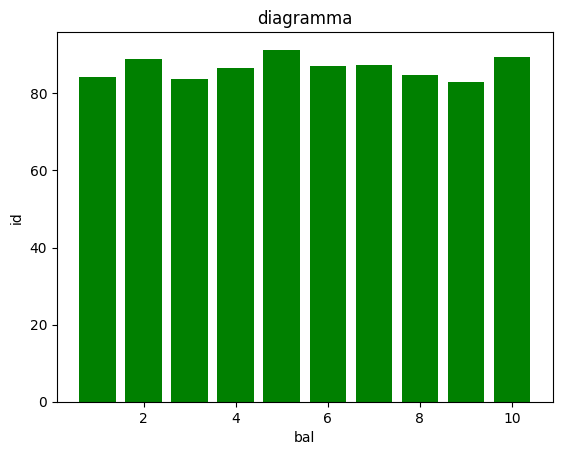

In [22]:
# Mashq 4: Har bir fannedagi o'rtacha ballarni vizualizatsiya qilish uchun ustunli diagramma chizing.
df1
import matplotlib.pyplot as plt
ID=df1['Student_ID']
bal=df1['Average']

plt.bar(ID,bal,color='g')
plt.title('diagramma')
plt.xlabel('bal')
plt.ylabel('id')
plt.show()

In [23]:
import pandas as pd

data2 = {
    'Date': pd.date_range(start='2023-01-01', periods=10),
    'Product_A': [120, 150, 130, 110, 140, 160, 135, 125, 145, 155],
    'Product_B': [90, 110, 100, 80, 95, 105, 98, 88, 102, 112],
    'Product_C': [75, 80, 85, 70, 88, 92, 78, 82, 87, 90]
}

df2 = pd.DataFrame(data2)


In [79]:
# 1-mashq: Har bir mahsulot bo'yicha umumiy savdolarni hisoblang.
df2[['Product_A','Product_B','Product_C']].sum(axis=0,).reset_index(name='sum')



,index,sum
0,Product_A,1370
1,Product_B,980
2,Product_C,827


In [109]:
#Mashq 2: Eng yuqori umumiy savdo bo'lgan sanani toping.
df2['sum_umumy']=df2[['Product_A','Product_B','Product_C']].sum(axis=1)
df2[['sum_umumy','Date']].max().reset_index(name='eng yuqori')

df2['Total_Sales'] = df2[['Product_A', 'Product_B', 'Product_C']].sum(axis=1)

max_sales_date = df2.loc[df2['Total_Sales'].idxmax(), 'Date']
max_sales_value = df2['Total_Sales'].max()

print(f"Eng yuqori umumiy savdo {max_sales_value} ga teng bo'lib, sana: {max_sales_date.date()}")

Eng yuqori umumiy savdo 357 ga teng bo'lib, sana: 2023-01-06


In [114]:
# Mashq 3: Har bir mahsulotning o'tgan kunga nisbatan savdodagi foiz o'zgarishini hisoblang.

# Har bir mahsulot uchun foiz o‘zgarishini hisoblash
df2_pct = df2.copy()
df2_pct[['Product_A', 'Product_B', 'Product_C']] = df2[['Product_A', 'Product_B', 'Product_C']].pct_change() * 100

print(df2_pct)


        Date  Product_A  Product_B  Product_C  sum_umumy  Total_Sales
0 2023-01-01        NaN        NaN        NaN        285          285
1 2023-01-02  25.000000  22.222222   6.666667        340          340
2 2023-01-03 -13.333333  -9.090909   6.250000        315          315
3 2023-01-04 -15.384615 -20.000000 -17.647059        260          260
4 2023-01-05  27.272727  18.750000  25.714286        323          323
5 2023-01-06  14.285714  10.526316   4.545455        357          357
6 2023-01-07 -15.625000  -6.666667 -15.217391        311          311
7 2023-01-08  -7.407407 -10.204082   5.128205        295          295
8 2023-01-09  16.000000  15.909091   6.097561        334          334
9 2023-01-10   6.896552   9.803922   3.448276        357          357


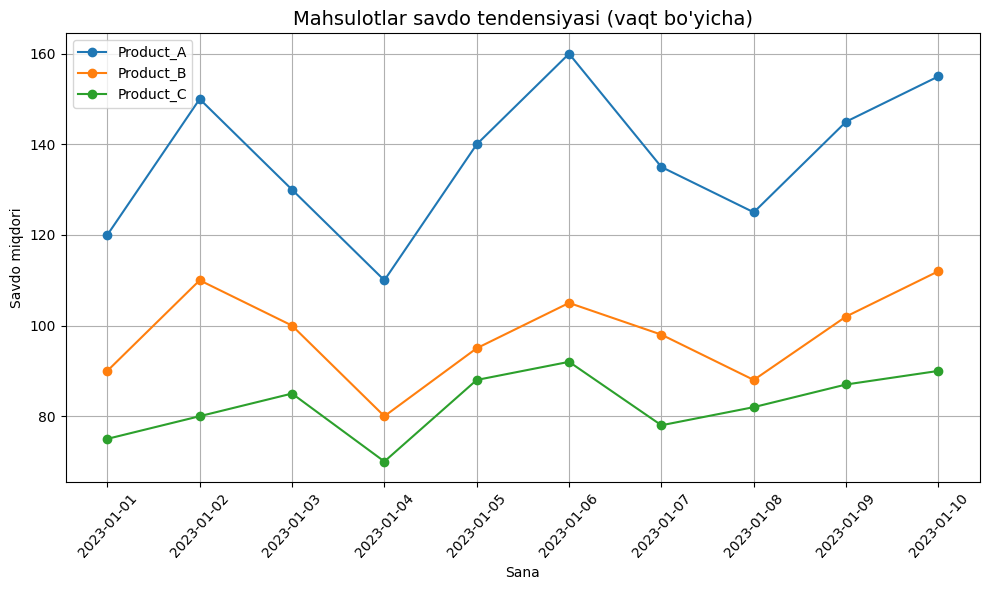

In [54]:
# Mashq 4: Har bir mahsulot uchun vaqt o'tishi bilan savdo tendensiyalarini ko'rsatish uchun chiziqli diagramma chizing.
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ma'lumotlar
df2
plt.figure(figsize=(10,6))
plt.plot(df2['Date'],df2['Product_A'],marker='o', label='Product_A')
plt.plot(df2['Date'],df2['Product_B'],marker='o', label='Product_B')
plt.plot(df2['Date'],df2['Product_C'],marker='o', label='Product_C')

plt.title("Mahsulotlar savdo tendensiyasi (vaqt bo'yicha)", fontsize=14)
plt.xlabel("Sana")
plt.ylabel("Savdo miqdori")
plt.legend()
plt.grid(True)
plt.xticks(rotation=48)
plt.tight_layout()



In [56]:
import pandas as pd

data3 = {
    'Employee_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Hank', 'Ivy', 'Jack'],
    'Department': ['HR', 'IT', 'Marketing', 'IT', 'Finance', 'HR', 'Marketing', 'IT', 'Finance', 'Marketing'],
    'Salary': [60000, 75000, 65000, 80000, 70000, 72000, 68000, 78000, 69000, 76000],
    'Experience (Years)': [3, 5, 2, 8, 4, 6, 3, 7, 2, 5]
}

df3 = pd.DataFrame(data3)
df3

,Employee_ID,Name,Department,Salary,Experience (Years)
0,101,Alice,HR,60000,3
1,102,Bob,IT,75000,5
2,103,Charlie,Marketing,65000,2
3,104,David,IT,80000,8
4,105,Emma,Finance,70000,4
5,106,Frank,HR,72000,6
6,107,Grace,Marketing,68000,3
7,108,Hank,IT,78000,7
8,109,Ivy,Finance,69000,2
9,110,Jack,Marketing,76000,5


In [58]:
# Har bir bo'lim uchun o'rtacha maoshni hisoblang.
df3.groupby('Department')['Salary'].agg('mean').reset_index()

,Department,Salary
0,Finance,69500.000000
1,HR,66000.000000
2,IT,77666.666667
3,Marketing,69666.666667


In [76]:
# 2-mashq: Eng ko'p tajribaga ega bo'lgan xodimni toping.
df3
hodm=df3.loc[df3['Experience (Years)'].idxmax(),'Name']
year=df3['Experience (Years)'].max()

print(f"Eng ko'p ishlagan hodim {hodm} tajribasi {year} yil ")

Eng ko'p ishlagan hodim David tajribasi 8 yil 


In [78]:
# Dataframedagi minimal maoshdan maoshdagi foiz oshishini ifodalovchi 'Maosh oshishi' nomli yangi ustun yarating.


df3 = pd.DataFrame(data3)

# Minimal maosh
min_salary = df3['Salary'].min()

# Yangi ustun: "Maosh oshishi"
df3['Maosh oshishi'] = (df3['Salary'] - min_salary) / min_salary * 100

print(df3)


   Employee_ID     Name Department  Salary  Experience (Years)  Maosh oshishi
0          101    Alice         HR   60000                   3       0.000000
1          102      Bob         IT   75000                   5      25.000000
2          103  Charlie  Marketing   65000                   2       8.333333
3          104    David         IT   80000                   8      33.333333
4          105     Emma    Finance   70000                   4      16.666667
5          106    Frank         HR   72000                   6      20.000000
6          107    Grace  Marketing   68000                   3      13.333333
7          108     Hank         IT   78000                   7      30.000000
8          109      Ivy    Finance   69000                   2      15.000000
9          110     Jack  Marketing   76000                   5      26.666667


Text(0, 0.5, 'soni')

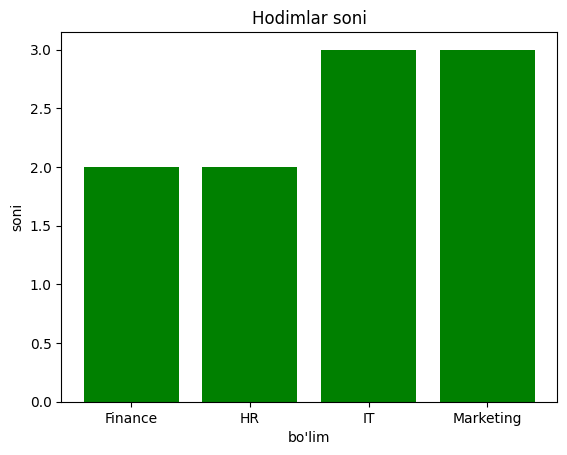

In [85]:
# 4-mashq: Turli bo‘limlar bo‘yicha xodimlar taqsimotini ko‘rsatish uchun ustun grafik chizing.
t=df3.groupby('Department')['Name'].agg('count').reset_index()
t
plt.bar(t['Department'],t['Name'],color='g')
plt.title('Hodimlar soni')
plt.xlabel("bo'lim")
plt.ylabel("soni")


In [106]:
import pandas as pd

data4 = {
    'Order_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Customer_ID': [201, 202, 203, 204, 205, 206, 207, 208, 209, 210],
    'Product': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'C', 'B', 'A'],
    'Quantity': [2, 3, 1, 4, 2, 3, 2, 5, 1, 3],
    'Total_Price': [120, 180, 60, 240, 160, 270, 140, 300, 90, 180]
}

df4 = pd.DataFrame(data4)

In [93]:
df4
#Mashq 1: Barcha buyurtmalardan kelgan umumiy tushumni hisoblang.
df4['Total_Price'].sum()



np.int64(1740)

In [99]:
# Mashq 2: Eng ko'p buyurtma qilingan mahsulotni toping.
t=df4.loc[df4['Quantity'].idxmax(),'Product']
d=df4['Quantity'].max()
print(f"eng ko'p harid qilingan {t} {d} ta")

eng ko'p harid qilingan C 5 ta


In [105]:
# Mashq 3: Buyurtma qilingan mahsulotlarning o'rtacha miqdorini hisoblang.
df4.groupby('Product')['Quantity'].agg('count').reset_index()

,Product,Quantity
0,A,4
1,B,3
2,C,3


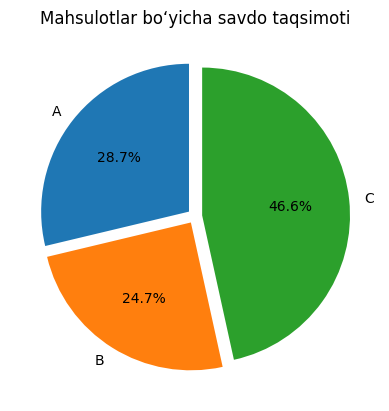

In [128]:
# Mashq 4: Turli mahsulotlar bo'yicha savdolar taqsimotini ko'rsatish uchun doira diagrammasini chizing.
df4 = pd.DataFrame(data4)

# Mahsulot bo‘yicha jami savdo
sales_sum = df4.groupby('Product')['Total_Price'].sum()
sales_sum
#Doira diagrammasi
plt.pie(sales_sum, labels=sales_sum.index, autopct='%1.1f%%', startangle=90,explode=[0.05, 0.05 ,0.05])
plt.title("Mahsulotlar bo‘yicha savdo taqsimoti")
plt.show()
